### Code for the term paper as a part of the course PHY637: Astrophysics 1

Methods as mentioned in the paper, ["Monte Carlo simulation of Lane–Emden type equations arising in
astrophysics"](https://www.sciencedirect.com/science/article/pii/S2213133722000798), El-Essawy, Nouh et al

In [36]:
#importing the required libraries

import numpy as np
import matplotlib.pyplot as plt

In [73]:
# functions required for the code, p is the polytropic index "n" as used in the paper

p=0

def func(y1,
         y2,
         e):

    return - (2*y2)/e - y1**p

def monte_carlo(func,
                y1,
                y2,
                a,
                b,
                n=10**6):
    """
    Monte Carlo integration
    """
    
    u = np.random.uniform(size=n)

    u_func = func( y1 = y1, y2 = y2, e = a + (b-a)*u )

    s = ((b-a)/n)*u_func.sum()
    
    return s

In [74]:
# initial conditions and calculating the plotting points

e1 = e2 = 0.0

deltaE=0.001

monte_go=True

y1=1
y2=0

list_y1=[1]
list_e=[0]

while monte_go:
        
    e2 = e2 + deltaE

    y2 = y2 + monte_carlo(func,
                          y1,
                          y2,
                          a=e1,
                          b=e2)

    y1 = y1 + deltaE*y2

    e1=e2

    list_y1.append(y1)
    
    list_e.append(e2)

    print(y1,e2)


    if y1 < 0:

        monte_go=False

0.999999 0.001
0.999998386499382 0.002
0.999997270572341 0.003
0.9999957967145148 0.004
0.9999939805769194 0.005
0.999991826700409 0.006
0.9999893368914825 0.007
0.9999865119918753 0.008
0.9999833525128551 0.009000000000000001
0.9999798588134878 0.010000000000000002
0.9999760310691415 0.011000000000000003
0.9999718694062845 0.012000000000000004
0.9999673739780487 0.013000000000000005
0.9999625448288625 0.014000000000000005
0.9999573820266372 0.015000000000000006
0.9999518856044026 0.016000000000000007
0.9999460556222985 0.017000000000000008
0.99993989210771 0.01800000000000001
0.9999333950810336 0.01900000000000001
0.9999265645574384 0.02000000000000001
0.9999194005571251 0.02100000000000001
0.9999119030816833 0.022000000000000013
0.999904072157265 0.023000000000000013
0.9998959077990934 0.024000000000000014
0.9998874100108298 0.025000000000000015
0.999878578808939 0.026000000000000016
0.9998694141824701 0.027000000000000017
0.999859916147987 0.028000000000000018
0.9998500847053832 0.0

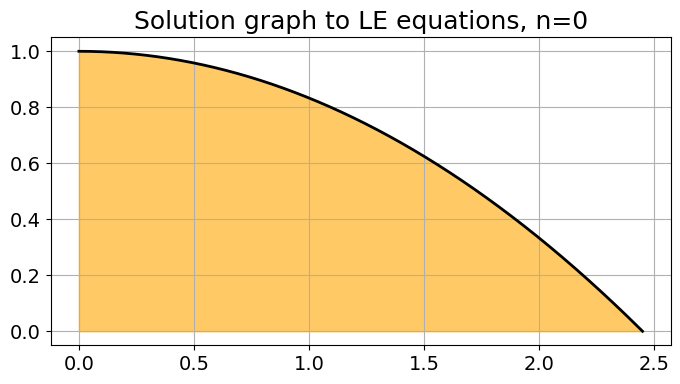

In [76]:
# plotting the solutions

rect = np.linspace(0,2.4,5)

plt.figure(figsize=(8,4))

plt.title("Solution graph to LE equations, n=0",
         fontsize=18)

plt.plot(list_e,
         list_y1,
         '-',
         c = 'k',
         lw = 2)

plt.fill_between(list_e,
                 y1 = list_y1,
                 y2 = 0,
                 color = 'orange',
                 alpha = 0.6)

plt.grid(True)

plt.xticks(fontsize = 14)

plt.yticks(fontsize = 14)

plt.show()